<a href="https://colab.research.google.com/github/Yamm23/Computer-Vision-Mini/blob/main/FruitImageClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os

raw_path = "/content/drive/MyDrive/CNN/Fruits9"
base_dir = "/content/fruits_split"
train_dir, val_dir, test_dir = [os.path.join(base_dir, d) for d in ["train", "val", "test"]]

# Create split folders
for d in [train_dir, val_dir, test_dir]: os.makedirs(d, exist_ok=True)

In [ ]:
import shutil
from sklearn.model_selection import train_test_split

# Go through each fruit class
for fruit_class in os.listdir(raw_path):
    class_path = os.path.join(raw_path, fruit_class)
    if not os.path.isdir(class_path): continue

    images = os.listdir(class_path)
    train_imgs, temp_imgs = train_test_split(images, test_size=0.3, random_state=42)
    val_imgs, test_imgs = train_test_split(temp_imgs, test_size=0.5, random_state=42)

    for folder, files in zip([train_dir, val_dir, test_dir], [train_imgs, val_imgs, test_imgs]):
        class_folder = os.path.join(folder, fruit_class)
        os.makedirs(class_folder, exist_ok=True)
        for img in files:
            shutil.copy(os.path.join(class_path, img), os.path.join(class_folder, img))


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_size = (64, 64)
batch_size = 16

train_gen = ImageDataGenerator(rescale=1./255).flow_from_directory(
    train_dir, target_size=img_size, batch_size=batch_size, class_mode='categorical'
)

val_gen = ImageDataGenerator(rescale=1./255).flow_from_directory(
    val_dir, target_size=img_size, batch_size=batch_size, class_mode='categorical'
)

test_gen = ImageDataGenerator(rescale=1./255).flow_from_directory(
    test_dir, target_size=img_size, batch_size=batch_size, class_mode='categorical', shuffle=False
)


Found 251 images belonging to 9 classes.
Found 54 images belonging to 9 classes.
Found 54 images belonging to 9 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(train_gen.num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(train_gen, epochs=15, validation_data=val_gen, callbacks=[early_stop])


Epoch 1/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 686ms/step - accuracy: 0.1380 - loss: 2.3869 - val_accuracy: 0.2407 - val_loss: 1.9410
Epoch 2/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 9s 552ms/step - accuracy: 0.2824 - loss: 1.8677 - val_accuracy: 0.4444 - val_loss: 1.5870
Epoch 3/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 9s 573ms/step - accuracy: 0.3787 - loss: 1.5473 - val_accuracy: 0.4444 - val_loss: 1.4481
Epoch 4/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 9s 578ms/step - accuracy: 0.5170 - loss: 1.3295 - val_accuracy: 0.6296 - val_loss: 1.3496
Epoch 5/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 8s 520ms/step - accuracy: 0.5624 - loss: 1.2014 - val_accuracy: 0.5556 - val_loss: 1.3419
Epoch 6/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 9s 572ms/step - accuracy: 0.6795 - loss: 0.8628 - val_accuracy: 0.5741 - val_loss: 1.1963
Epoch 7/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 9s 594ms/step - accuracy: 0.7660 - loss: 0.7556 - val_accuracy: 0.5556 - val_loss: 1.3273
Epoch 8/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 8s 495ms/step - accuracy: 0.8017 - loss: 0.6900 - val_accuracy: 0

In [ ]:
# Evaluate
loss, acc = model.evaluate(test_gen)
print(f"Test Accuracy: {acc * 100:.2f}%")


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 402ms/step - accuracy: 0.5921 - loss: 1.2755
Test Accuracy: 57.41%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


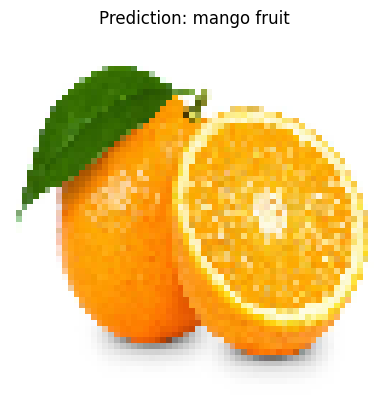

In [ ]:
# Predict a test image
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

def predict_image(img_path):
    img = image.load_img(img_path, target_size=img_size)
    img_array = image.img_to_array(img) / 255.0
    img_tensor = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_tensor)
    class_idx = np.argmax(prediction)
    class_name = list(train_gen.class_indices.keys())[class_idx]

    plt.imshow(img)
    plt.title(f"Prediction: {class_name}")
    plt.axis('off')
    plt.show()

# Example:
predict_image("/content/fruits_split/test/orange fruit/Image_1.jpg")
